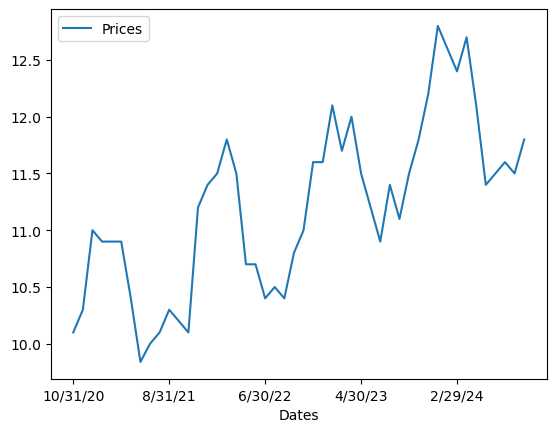

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data/Nat_Gas.csv")
data.plot(x='Dates', y='Prices', kind='line')
plt.show()


In [10]:
import numpy as np

x = np.array(range(len(data)))
y = data.iloc[:, 1].values

p = np.polyfit(x, y, 3)
x_new = np.array(range(len(data), len(data) + 12))
y_new = np.polyval(p, x_new)

print(y_new)


[11.69121904 11.61896042 11.53582924 11.44140579 11.33527033 11.21700317
 11.08618456 10.94239481 10.78521419 10.61422298 10.42900147 10.22912994]


In [15]:
y_new

array([11.69121904, 11.61896042, 11.53582924, 11.44140579, 11.33527033,
       11.21700317, 11.08618456, 10.94239481, 10.78521419, 10.61422298,
       10.42900147, 10.22912994])

### Seasonal trends can also affect natural gas prices, with prices typically higher in the winter months due to increased demand for heating.

In [7]:
data.columns

Index(['Dates', 'Prices'], dtype='object')

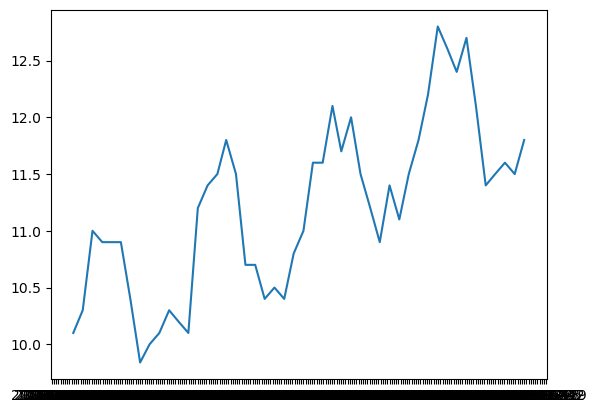

In [11]:
import matplotlib.dates as mdates

data = pd.read_csv("data/Nat_Gas.csv")
data['Dates'] = pd.to_datetime(data['Dates'])
data.set_index('Dates', inplace=True)

fig, ax = plt.subplots()
ax.plot(data['Prices'])

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()

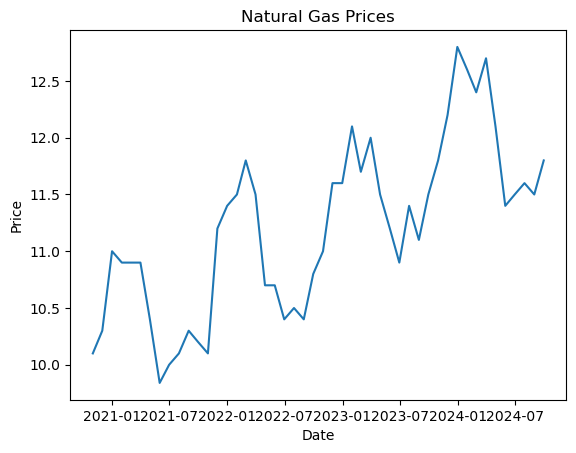

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data/Nat_Gas.csv")
data['Dates'] = pd.to_datetime(data['Dates'])
data.set_index('Dates', inplace=True)

fig, ax = plt.subplots()
ax.plot(data['Prices'])

plt.title('Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()


In [20]:
import numpy as np

def calculate_contract_value(injection_dates, withdrawal_dates, purchase_prices, sale_prices, injection_rates, withdrawal_rates, max_volume, storage_costs):
    # Calculate the expected cash inflows from selling natural gas in winter
    cash_inflows = np.sum(np.multiply(sale_prices, withdrawal_rates) * max_volume)

    # Calculate the present value of the expected cash inflows
    present_value_cash_inflows = cash_inflows / (1 + 0) ** (withdrawal_dates[-1] - injection_dates[0]).days

    # Calculate the expected cash outflows from buying and storing natural gas in summer
    cash_outflows = np.sum(np.multiply(purchase_prices, injection_rates) * max_volume) + storage_costs

    # Calculate the present value of the expected cash outflows
    present_value_cash_outflows = cash_outflows / (1 + 0) ** (injection_dates[-1] - injection_dates[0]).days

    # Calculate the net present value (NPV)
    npv = present_value_cash_inflows - present_value_cash_outflows

    return npv


In [21]:
# You can test this function by passing in sample inputs. For example:

from datetime import datetime

injection_dates = [datetime(2020, 10, 31), datetime(2020, 11, 30)]
withdrawal_dates = [datetime(2021, 1, 31), datetime(2021, 2, 28)]
purchase_prices = [10.1, 10.3]
sale_prices = [10.9, 10.9]
injection_rates = [1000000, 1000000]
withdrawal_rates = [1000000, 1000000]
max_volume = 1000000
storage_costs = 100000

npv = calculate_contract_value(injection_dates=injection_dates,
                               withdrawal_dates=withdrawal_dates,
                               purchase_prices=purchase_prices,
                               sale_prices=sale_prices,
                               injection_rates=injection_rates,
                               withdrawal_rates=withdrawal_rates,
                               max_volume=max_volume,
                               storage_costs=storage_costs)

print(f"Net present value: ${npv:.2f}")


Net present value: $1399999900000.00
